In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('cleaned_data.csv',index_col='Date Local')
data = data.rename(columns={'NO2 AQI (PPB)':'NO2 AQI','SO2 AQI (PPB)':'SO2 AQI','O3 AQI (PPM)':'O3 AQI','CO AQI (PPM)':'CO AQI'})
data.head()
data.index = pd.to_datetime(data.index,format="%Y-%m-%d")

1. we have load data. the data has been cleaned already. the task that perform for cleaning data are reduced dimensionality, remove missing value.
2. renamed column names and added unit with it.
3. formated date columns and made it as index.

In [3]:
county = data['State'].unique()
county.sort()
county

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Missouri', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia',
       'Washington', 'Wisconsin', 'Wyoming'], dtype=object)

checking how many states are present in data.

In [4]:
data.head()

,Site Num,State,County,City,NO2 Mean (PPB),NO2 1st Max Value (PPB),NO2 1st Max Hour (PPB),NO2 AQI,O3 Mean (PPM),O3 1st Max Value (PPM),O3 1st Max Hour (PPM),O3 AQI,SO2 Mean (PPB),SO2 1st Max Value (PPB),SO2 1st Max Hour (PPB),SO2 AQI,CO Mean (PPM),CO 1st Max Value (PPM),CO 1st Max Hour (PPM),CO AQI
Date Local,,,,,,,,,,,,,,,,,,,,
2000-01-01,3002,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2000-01-02,3002,Arizona,Maricopa,Phoenix,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,1.066667,2.3,0,26.0
2000-01-03,3002,Arizona,Maricopa,Phoenix,38.125000,51.0,8,48,0.007958,0.016,9,14,5.250000,11.0,19,16.0,1.762500,2.5,8,28.0
2000-01-04,3002,Arizona,Maricopa,Phoenix,40.260870,74.0,8,72,0.014167,0.033,9,28,7.083333,16.0,8,23.0,1.829167,3.0,23,34.0
2000-01-05,3002,Arizona,Maricopa,Phoenix,48.450000,61.0,22,58,0.006667,0.012,9,10,8.708333,15.0,7,21.0,2.700000,3.7,2,42.0


##Next
* Creating temparory data which holds average 
of Original data for every month starting from January 2000 to May 2016
* Here we only selecting those columns which are we going to forecast


In [5]:
temp_data = data[['O3 AQI','SO2 AQI','NO2 AQI','CO AQI']].groupby(pd.Grouper(freq="M")).mean()
temp_data.head()

,O3 AQI,SO2 AQI,NO2 AQI,CO AQI
Date Local,,,,
2000-01-31,19.501178,12.750196,36.684996,16.916732
2000-02-29,26.666112,11.908410,35.103247,12.726894
2000-03-31,33.244010,12.192938,32.340479,9.523329
2000-04-30,37.590200,14.028062,30.936303,7.853898
2000-05-31,45.668107,14.235955,28.751080,6.671997


* Here we are creating a function which shows line graphs of all features and shows the tred is downword or upword.

In [6]:
def ts_graph(data):
  figure, axis = plt.subplots(4,figsize=(15, 15))
  mean_rolling = data.rolling(window=12).mean()
  std_rollling = data.rolling(window=12).std()

  axis[0].plot(data.index, data['SO2 AQI'], color='tab:red',label = "Original")
  axis[0].plot(mean_rolling['SO2 AQI'],color = "black",label = 'Trend')
  axis[0].set_title("SO2 Graph")

  axis[1].plot(data.index, data['NO2 AQI'], color='tab:red',label = "Original")
  axis[1].plot(mean_rolling['NO2 AQI'],color = "black",label = 'Trend')
  axis[1].set_title("NO2 Graph")

  axis[2].plot(data.index, data['CO AQI'], color='tab:red',label = "Original")
  axis[2].plot(mean_rolling['CO AQI'],color = "black",label = 'Trend')
  axis[2].set_title("CO Graph")

  axis[3].plot(data.index, data['O3 AQI'], color='tab:red',label = "Original")
  axis[3].plot(mean_rolling['O3 AQI'],color = "black",label = 'Trend')
  axis[3].set_title("O3 Graph")

created function which shows time series graph for all polutant. As we are going to plot timeseries graph multiple time in this project, i created function which make code easy.
In this function, i have change graph size to make graph more visible.
then i have calculated the rolling mean and std_rolling. we use rolling mean to get trend of data.

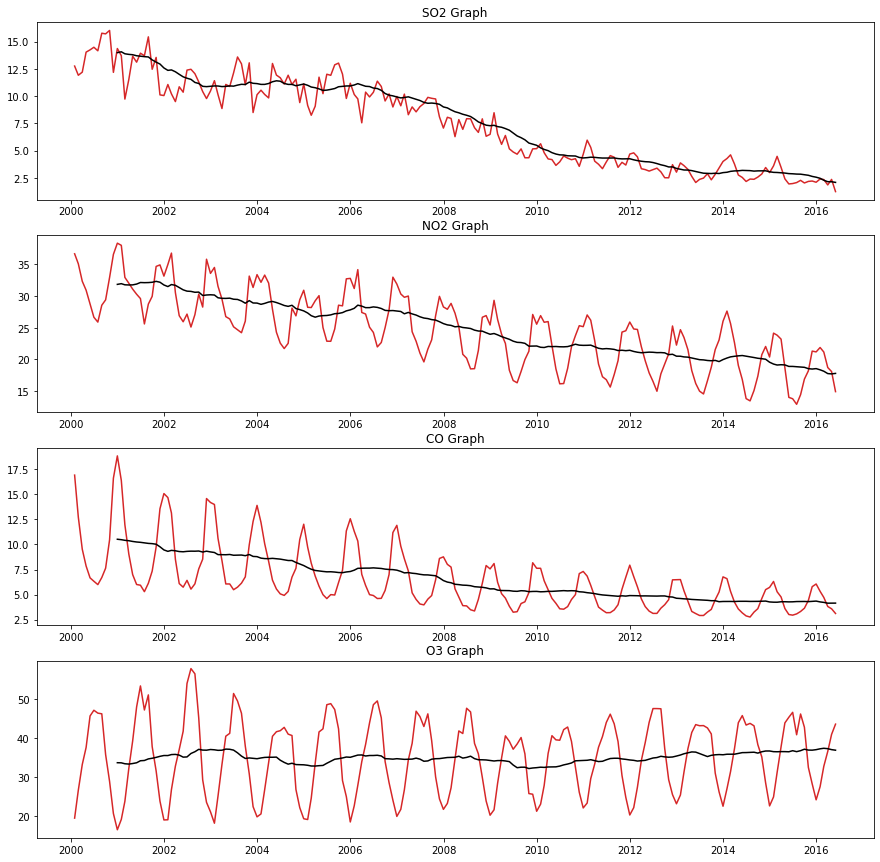

In [7]:
ts_graph(temp_data)

The red line shows sesonality of data and the black indicate trend of the data.

we can see all the feature are not **stationary** except O3 graph. It seems stationary but we are not sure.

let's create function which provide statistical data about the data to verify stationarity of data.

In [8]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
def test_stationary(data):
  data.dropna(axis = 0,inplace = True)
  dftest_O3 = adfuller(data['O3 AQI'])
  dftest_NO2 = adfuller(data['NO2 AQI'])
  dftest_CO = adfuller(data['CO AQI'])
  dftest_SO2 = adfuller(data['SO2 AQI'])
  values = {'index':['ADF','P-Value','Num of Lags','Num of Observations'],
            'O3':[i for i in dftest_O3[:-2]],'NO2':[i for i in dftest_NO2[:-2]],
            'CO':[i for i in dftest_CO[:-2]],'SO2':[i for i in dftest_SO2[:-2]]}
  return pd.DataFrame(values)

We have used adfuller model to check stationarity of data

In [9]:
test_stationary(temp_data)

,index,O3,NO2,CO,SO2
0,ADF,-1.835107,-0.633324,-1.855595,-1.235311
1,P-Value,0.363176,0.863273,0.353230,0.658225
2,Num of Lags,11.000000,15.000000,15.000000,12.000000
3,Num of Observations,185.000000,181.000000,181.000000,184.000000


In Adfullter test, if we get p-value less than 0.05 than we consider the data is stationary. But the result show none of above variable are statinary

Converting data into log to minimuze data value however it'll not change pattern of data it make trend more smoother than orginal

In [10]:
log_data = np.log(temp_data)

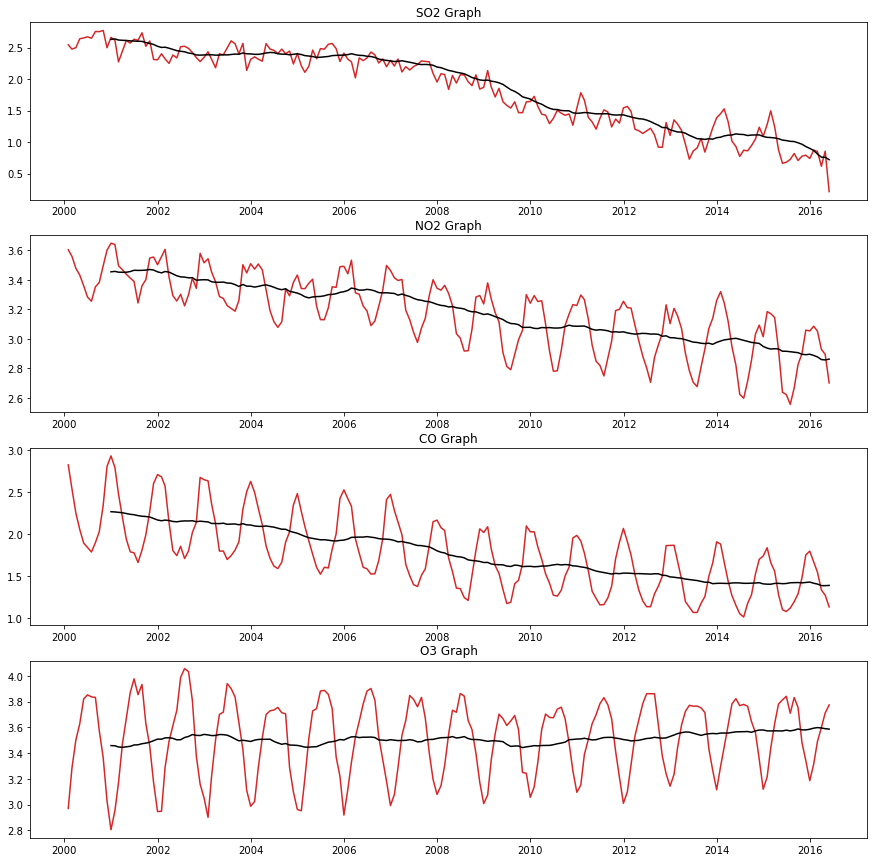

In [11]:
ts_graph(log_data)

let's decompose the data for better understanding. it split the data into several component, the each representing an underlying pattern category, trend, seasonality, and noise.

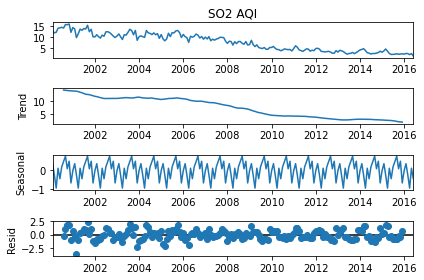

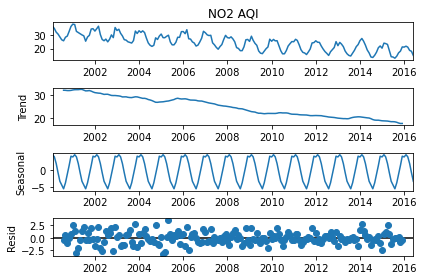

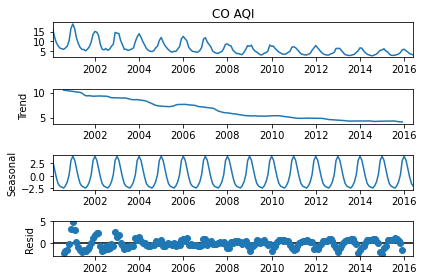

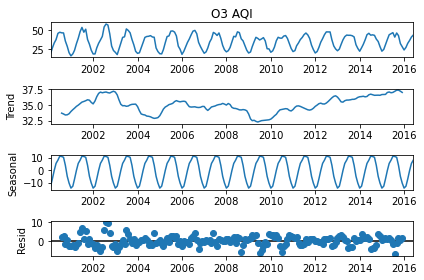

In [12]:
sm.tsa.seasonal_decompose(temp_data['SO2 AQI'], model='additive').plot()
sm.tsa.seasonal_decompose(temp_data['NO2 AQI'], model='additive').plot()
sm.tsa.seasonal_decompose(temp_data['CO AQI'], model='additive').plot()
sm.tsa.seasonal_decompose(temp_data['O3 AQI'], model='additive').plot()
plt.show()

* As above we seen, The data is not stationary. for time series model, one of the assumption is that data should be stationary.
* There are several methods to make data into stationary but here, we use shifting method for this data.

In [13]:
log_data

,O3 AQI,SO2 AQI,NO2 AQI,CO AQI
Date Local,,,,
2000-01-31,2.970475,2.545547,3.602368,2.828303
2000-02-29,3.283394,2.477245,3.558294,2.543717
2000-03-31,3.503875,2.500857,3.476320,2.253744
2000-04-30,3.626743,2.641060,3.431930,2.061010
2000-05-31,3.821400,2.655771,3.358675,1.897919
...,...,...,...,...
2016-01-31,3.316108,0.873983,3.085383,1.673176
2016-02-29,3.489349,0.852498,3.052284,1.552365
2016-03-31,3.599469,0.617092,2.929278,1.339788


In [16]:
mean_rolling = log_data.rolling(window=12).mean()
stat_data = log_data[['CO AQI','NO2 AQI','SO2 AQI','O3 AQI']] - log_data[['CO AQI','NO2 AQI','SO2 AQI','O3 AQI']].shift(1)
#stat_data['O3 AQI'] = log_data['O3 AQI'] - mean_rolling['O3 AQI']
stat_data.dropna(axis=0,inplace=True)

In [17]:
stat_data

,CO AQI,NO2 AQI,SO2 AQI,O3 AQI
Date Local,,,,
2000-02-29,-0.284586,-0.044074,-0.068302,0.312919
2000-03-31,-0.289973,-0.081974,0.023612,0.220481
2000-04-30,-0.192735,-0.044389,0.140203,0.122869
2000-05-31,-0.163091,-0.073255,0.014711,0.194657
2000-06-30,-0.052436,-0.075636,0.016696,0.031512
...,...,...,...,...
2016-01-31,-0.128611,0.032259,0.133234,0.130071
2016-02-29,-0.120810,-0.033099,-0.021485,0.173241
2016-03-31,-0.212577,-0.123006,-0.235406,0.110121


Now let's plot graphs to check stationarity.

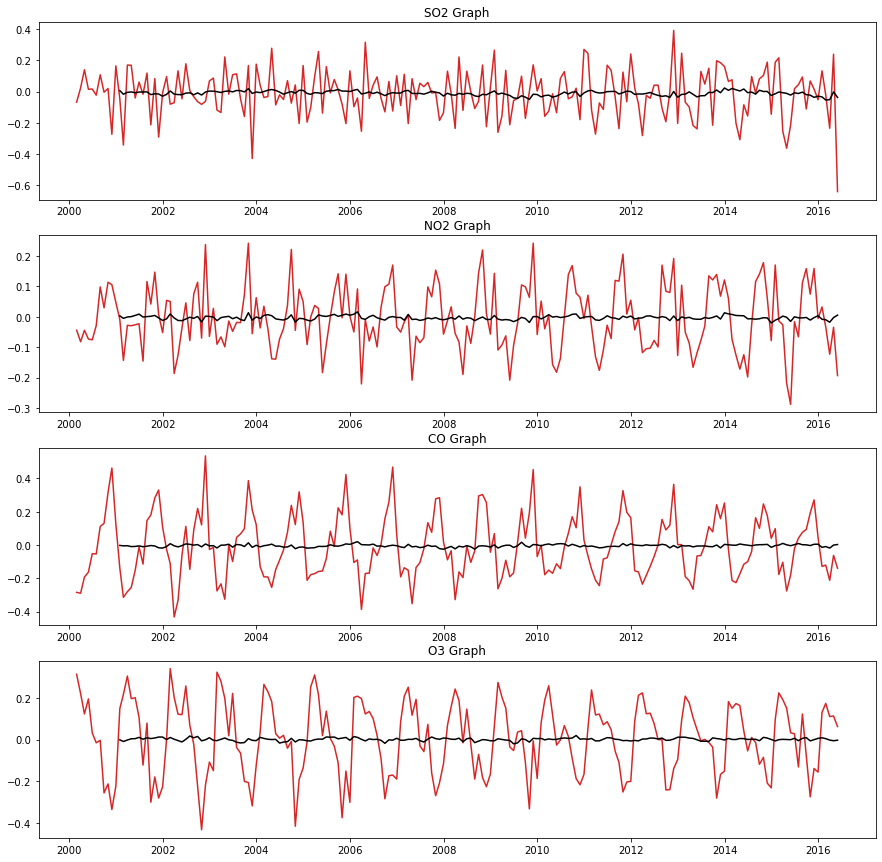

In [18]:
ts_graph(stat_data)

Here, we see it seems stationary, the trend is constant now.

In [45]:
test_stationary(stat_data)

,index,O3,NO2,CO,SO2
0,ADF,-1.490032e+01,-3.799471,-3.340266,-3.492001
1,P-Value,1.510444e-27,0.002913,0.013172,0.008195
2,Num of Lags,1.000000e+01,14.000000,14.000000,13.000000
3,Num of Observations,1.850000e+02,181.000000,181.000000,182.000000


The value are much better now. all p-values are below 0.05 so we can say that now our data is stationary.

* To make forecast we are using ARIMA model which is one of the power technique to predict time series data.
* Basically the ARIMA model is combition of three diffrent models. Which are the **A**uto **R**eggresion, **I**integration and **M**oving **A**verage.
* To use ARIMA model we required 3 parameter p,d and q.
* we can find q from ACF and p from PACF, the value of d will be 1 in our case because we have shifted value by 1 which make our data stationary so differnce will be 1.

##CO AQI

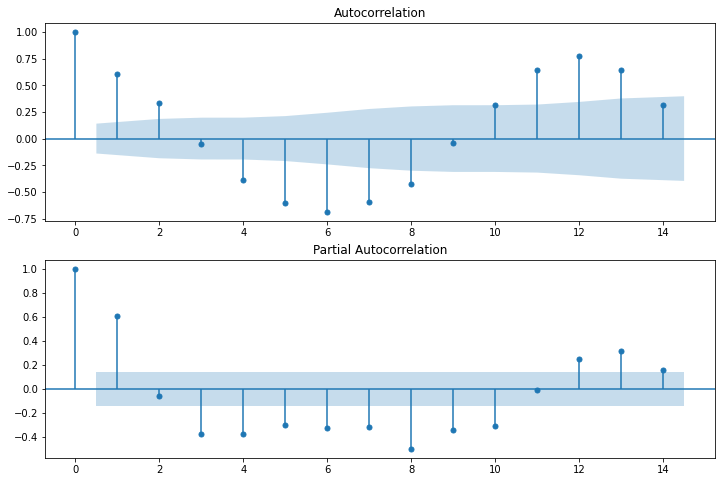

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stat_data['CO AQI'], lags=14, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stat_data['CO AQI'], lags=14, ax=ax2)

* ACF graph we can see significant lags getting cover at lag 9 so our q will be 9.
* From PACF graph, singnificant lags getting cover at 11 but we will p = 10 as it gives lower AIC.
* for this data we will choose p = 10, d=1, and q = 9 to get optimal model.


In [47]:
log_data

,O3 AQI,SO2 AQI,NO2 AQI,CO AQI
Date Local,,,,
2000-01-31,2.970475,2.545547,3.602368,2.828303
2000-02-29,3.283394,2.477245,3.558294,2.543717
2000-03-31,3.503875,2.500857,3.476320,2.253744
2000-04-30,3.626743,2.641060,3.431930,2.061010
2000-05-31,3.821400,2.655771,3.358675,1.897919
...,...,...,...,...
2016-01-31,3.316108,0.873983,3.085383,1.673176
2016-02-29,3.489349,0.852498,3.052284,1.552365
2016-03-31,3.599469,0.617092,2.929278,1.339788


In [20]:
arima_mod6 = sm.tsa.ARIMA(log_data['CO AQI'], order=(10,1,2)).fit(disp=-1)
print(arima_mod6.summary())

/Users/kevalharkhani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.CO AQI   No. Observations:                  196
Model:                ARIMA(10, 1, 2)   Log Likelihood                 235.780
Method:                       css-mle   S.D. of innovations              0.070
Date:                Sun, 06 Nov 2022   AIC                           -443.559
Time:                        15:20:25   BIC                           -397.666
Sample:                    02-29-2000   HQIC                          -424.979
                         - 05-31-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0047      0.001     -4.858      0.000      -0.007      -0.003
ar.L1.D.CO AQI      0.4932      0.129      3.837      0.000       0.241       0.745
ar.L2.D.CO AQI     -0.5845      

Now our model is ready and let's check the prediction

In [21]:
result = arima_mod6.fittedvalues

In [107]:
arima_mod6.forecast()

(array([1.02032444]), array([0.07040729]), array([[0.88232869, 1.15832019]]))

In [22]:
result

Date Local
2000-02-29   -0.004699
2000-03-31   -0.175818
2000-04-30   -0.170268
2000-05-31   -0.065762
2000-06-30    0.015951
                ...   
2016-01-31   -0.020982
2016-02-29   -0.051751
2016-03-31   -0.130547
2016-04-30   -0.150714
2016-05-31   -0.195115
Freq: M, Length: 196, dtype: float64

Those are value that our model has predicted.

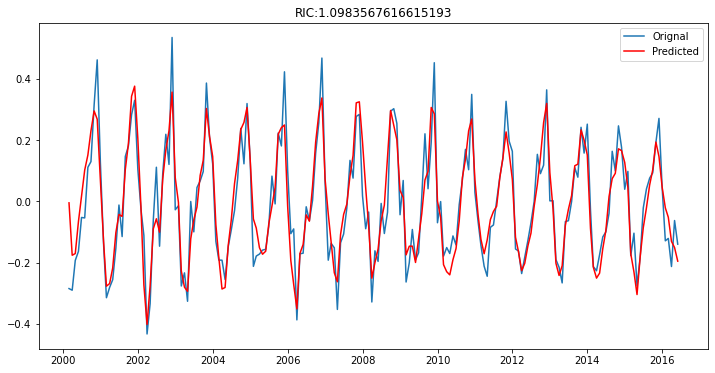

In [23]:
plt.figure(figsize=(12,6))
plt.plot(stat_data['CO AQI'],label = "Orignal")
plt.plot(result,color = 'red',label = "Predicted")
plt.title("RIC:"+str(((result - stat_data['CO AQI'])**2).sum(axis='index')))
plt.legend()
plt.show()

As we see the graph shows our prediction quite similar to origanal data.

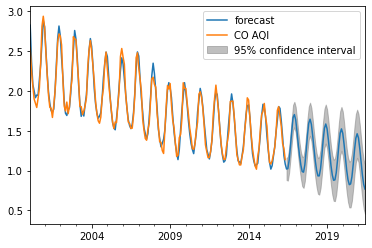

In [ ]:
arima_mod6.plot_predict(1,257)
plt.show()

We have forecasted for 5 year data. the blue line represents forecast values and grey area is confidence interval which suggest that model is 95% confident that value will be lies in that grey area and we can notice that the forecasted value has downtrend which matching with orignal data.

In [ ]:
np.exp(arima_mod6.forecast(steps = 12)[0])

array([2.77409465, 2.78524739, 3.09568818, 3.67603274, 4.45157096,
       5.28461832, 5.48891966, 5.14915002, 4.43697751, 3.76125541,
       3.26270459, 2.89967438])

The value we are getting for forecast, will be in log. in order to convert into orignal value we must need to do exponential of forecast value

##NO2 AQI

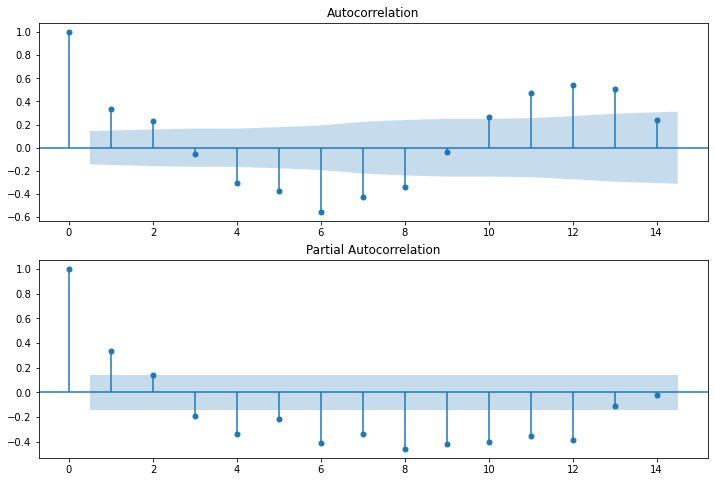

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stat_data['NO2 AQI'], lags=14, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stat_data['NO2 AQI'], lags=14, ax=ax2)

505

In [ ]:
arima_mod6 = sm.tsa.ARIMA(log_data['NO2 AQI'], order=(12,1,1)).fit(disp=-1)
print(arima_mod6.summary())

/Users/kevalharkhani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/kevalharkhani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  

                             ARIMA Model Results                              
Dep. Variable:              D.NO2 AQI   No. Observations:                  196
Model:                ARIMA(12, 1, 1)   Log Likelihood                 272.656
Method:                       css-mle   S.D. of innovations              0.059
Date:                Sat, 13 Aug 2022   AIC                           -515.312
Time:                        00:10:18   BIC                           -466.140
Sample:                    02-29-2000   HQIC                          -495.405
                         - 05-31-2016                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0032      0.000    -16.342      0.000      -0.004      -0.003
ar.L1.D.NO2 AQI      0.4526      0.071      6.404      0.000       0.314       0.591
ar.L2.D.NO2 AQI      0.0340 

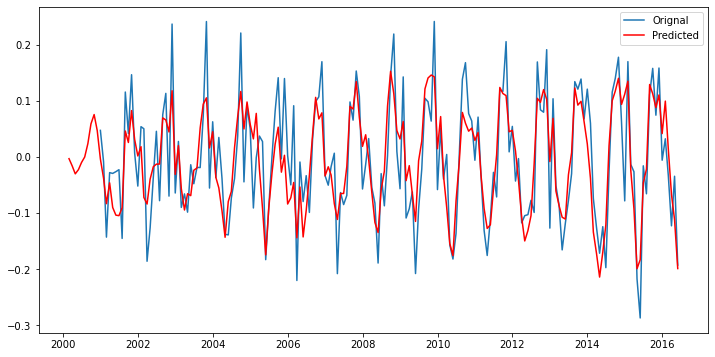

In [ ]:
result = arima_mod6.fittedvalues
plt.figure(figsize=(12,6))
plt.plot(stat_data['NO2 AQI'],label = "Orignal")
plt.plot(result,color = 'red',label = "Predicted")
plt.title("RIC:"+str(((result - stat_data['NO2 AQI'])**2).sum(axis='index')))
plt.legend()
plt.show()

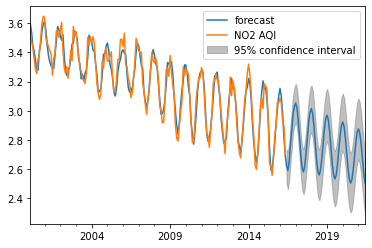

In [ ]:
arima_mod6.plot_predict(1,257)
plt.show()

In [ ]:
np.exp(arima_mod6.forecast(steps = 12)[0])

array([13.72002482, 13.31904985, 14.14767503, 15.92818314, 17.57769138,
       19.66328457, 20.63363398, 21.16947875, 20.44130474, 18.68709671,
       16.69412572, 14.62618746])

## SO2

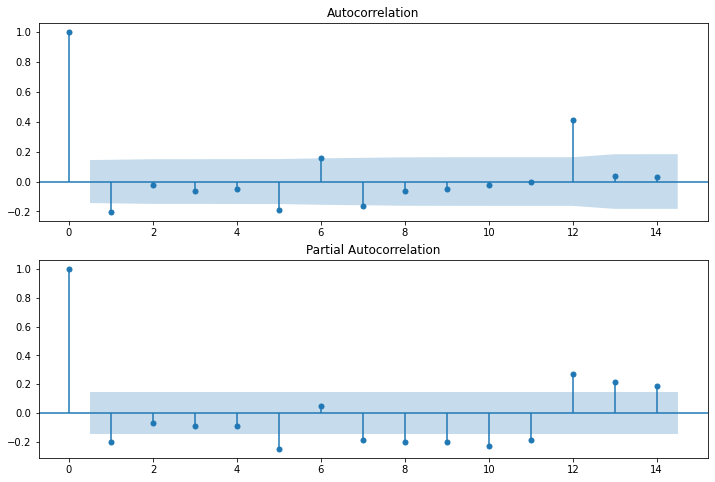

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stat_data['SO2 AQI'], lags=14, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stat_data['SO2 AQI'], lags=14, ax=ax2)

In [ ]:
arima_mod6 = sm.tsa.ARIMA(log_data['SO2 AQI'], order=(11,1,0)).fit(disp=-1)
print(arima_mod6.summary())

/Users/kevalharkhani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.SO2 AQI   No. Observations:                  196
Model:                ARIMA(11, 1, 0)   Log Likelihood                 128.820
Method:                       css-mle   S.D. of innovations              0.124
Date:                Sat, 13 Aug 2022   AIC                           -231.639
Time:                        00:10:34   BIC                           -189.024
Sample:                    02-29-2000   HQIC                          -214.387
                         - 05-31-2016                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0105      0.002     -6.443      0.000      -0.014      -0.007
ar.L1.D.SO2 AQI     -0.4978      0.072     -6.900      0.000      -0.639      -0.356
ar.L2.D.SO2 AQI     -0.4155 

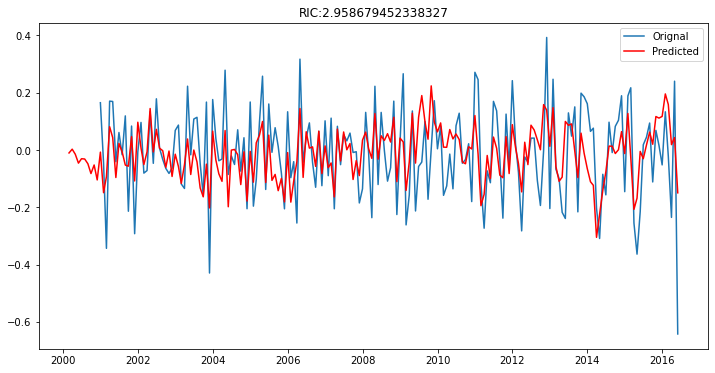

In [ ]:
result = arima_mod6.fittedvalues
plt.figure(figsize=(12,6))
plt.plot(stat_data['SO2 AQI'],label = "Orignal")
plt.plot(result,color = 'red',label = "Predicted")
plt.legend()
plt.title("RIC:"+str(((result - stat_data['SO2 AQI'])**2).sum(axis='index')))
plt.show()

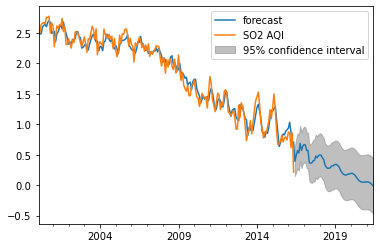

In [ ]:
arima_mod6.plot_predict(1,257)
plt.show()

In [ ]:
np.exp(arima_mod6.forecast(steps = 12)[0])

array([1.47959561, 1.6259237 , 1.76370546, 1.69475968, 1.98573633,
       1.7676608 , 1.89645519, 1.94662654, 1.9340841 , 1.76933261,
       1.77101724, 1.44532818])

##O3

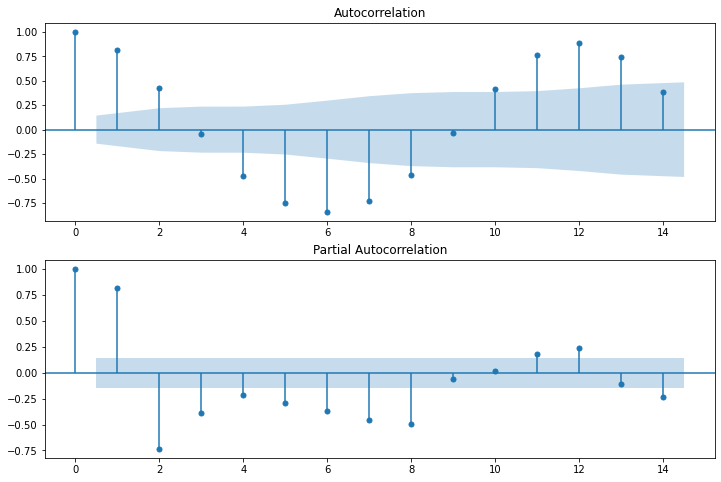

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stat_data['O3 AQI'], lags=14, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stat_data['O3 AQI'], lags=14, ax=ax2)

In [ ]:
arima_mod6 = sm.tsa.ARIMA(log_data['O3 AQI'], order=(11,1,2)).fit(disp=-1)
print(arima_mod6.summary())

/Users/kevalharkhani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/kevalharkhani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  

                             ARIMA Model Results                              
Dep. Variable:               D.O3 AQI   No. Observations:                  196
Model:                ARIMA(11, 1, 2)   Log Likelihood                 253.494
Method:                       css-mle   S.D. of innovations              0.064
Date:                Sat, 13 Aug 2022   AIC                           -476.988
Time:                        00:11:13   BIC                           -427.817
Sample:                    02-29-2000   HQIC                          -457.081
                         - 05-31-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0006      0.001      0.753      0.451      -0.001       0.002
ar.L1.D.O3 AQI      0.2141      0.205      1.042      0.297      -0.188       0.617
ar.L2.D.O3 AQI     -0.7606      

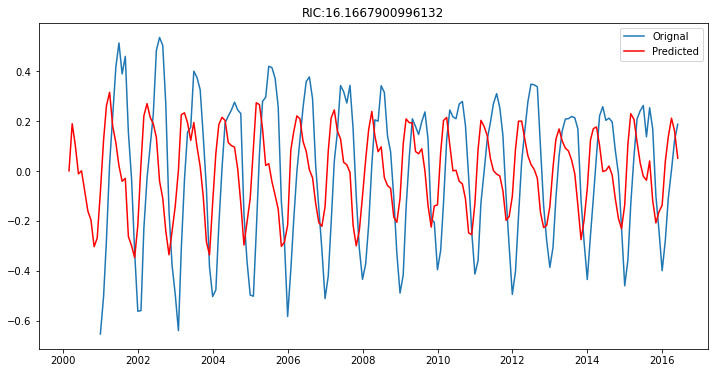

In [ ]:
result = arima_mod6.fittedvalues
plt.figure(figsize=(12,6))
plt.plot(stat_data['O3 AQI'],label = "Orignal")
plt.plot(result,color = 'red',label = "Predicted")
plt.legend()
plt.title("RIC:"+str(((result - stat_data['O3 AQI'])**2).sum(axis='index')))
plt.show()

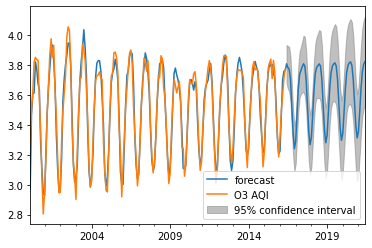

In [ ]:
arima_mod6.plot_predict(1,257)
plt.show()

In [ ]:
np.exp(arima_mod6.forecast(steps = 12)[0])

array([45.11907066, 44.06042212, 43.57310755, 40.82219882, 34.22495257,
       28.57853544, 25.57930853, 26.84794959, 31.96268225, 38.19935385,
       42.04303309, 43.14295527])